In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('boston_housing_prices.csv')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def build_enhanced_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))  # Output layer with no activation function
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_enhanced_model()

In [4]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 578.1541 - mae: 21.8606 - val_loss: 373.1919 - val_mae: 17.6518
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 368.7019 - mae: 17.0254 - val_loss: 205.6704 - val_mae: 12.6903
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 170.9637 - mae: 11.1751 - val_loss: 79.3147 - val_mae: 7.0544
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.9598 - mae: 7.9669 - val_loss: 43.1827 - val_mae: 4.7480
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.7063 - mae: 5.5500 - val_loss: 30.8915 - val_mae: 3.7462
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 53.3620 - mae: 5.4125 - val_loss: 26.7069 - val_mae: 3.6033
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.2024 - mae: 4.8535 - val_loss: 26.6735 - val_mae: 3.6304
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.6974 - mae: 4.8444 - val_loss: 25.9550 - val_mae: 3.5529
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━

In [5]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2658 - mae: 2.0053
Mean Absolute Error on test data: 2.191685199737549


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


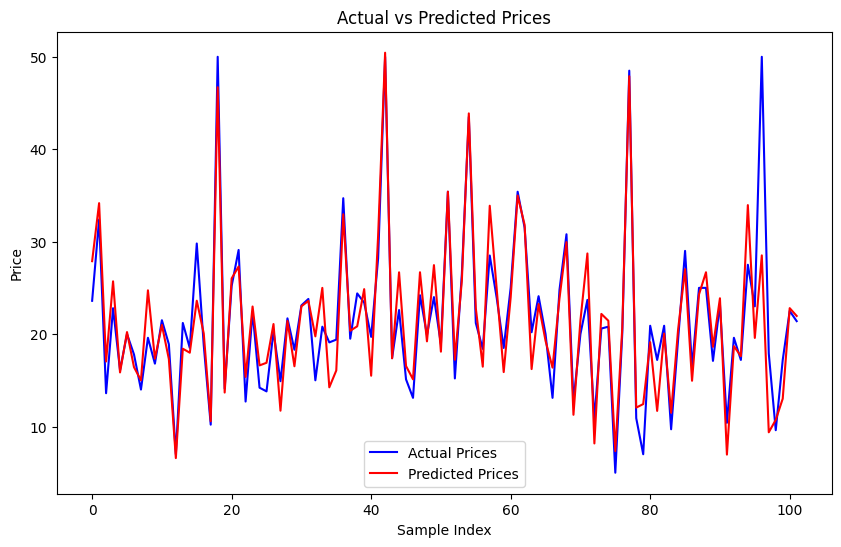

In [7]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()